Выберите 3-4 регрессионные модели (например, LightGBM, XGBoost) и обучите их предсказывать целевую переменную "gap" на параметрах по умолчанию (используйте 10-кратную кросс-валидацию).
Примечание: для каждой модели есть пример использования на scikit-learn.org.

2. Визуализируйте результаты с помощью графика R2 (предсказанное против реального), сравните производительность моделей и скорость обучения.

3. Оптимизируйте модель с наилучшими показателями, используя настройку гиперпараметров (поиск по сетке)


In [2]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 5.1 MB/s eta 0:00:0000:0100:01


In [5]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 2.4 MB/s eta 0:00:0000:0100:04


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import xgboost as xgb

import time
from sklearn.metrics import r2_score

In [8]:
data = pd.read_csv('dataset_PCA__v2.4.csv')

In [9]:
# Разделим данные на признаки и целевую переменную
X = data.drop(['gap', 'smiles'], axis=1)  
y = data['gap']

# LightGBM
Тут всё довольно типично, просто юзаем модельки и смотрим метрики

In [10]:
# Разделение данных на тренировочную и тестовую выборки с помощью кросс-валидации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Определим модель LightGBM
model = lgb.LGBMRegressor()

# Обучение модели
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15555
[LightGBM] [Info] Number of data points in the train set: 13192, number of used features: 61
[LightGBM] [Info] Start training from score 0.507145


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002521 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15555
[LightGBM] [Info] Number of data points in the train set: 14841, number of used features: 61
[LightGBM] [Info] Start training from score 0.506739
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15555
[LightGBM] [Info] Number of data points in the train set: 14841, number of used features: 61
[LightGBM] [Info] Start training from score 0.507739
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002530 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15555
[LightGBM] [Info] Number of data points in the train set: 14841, number of used features: 61
[LightGBM] [Info] Start 

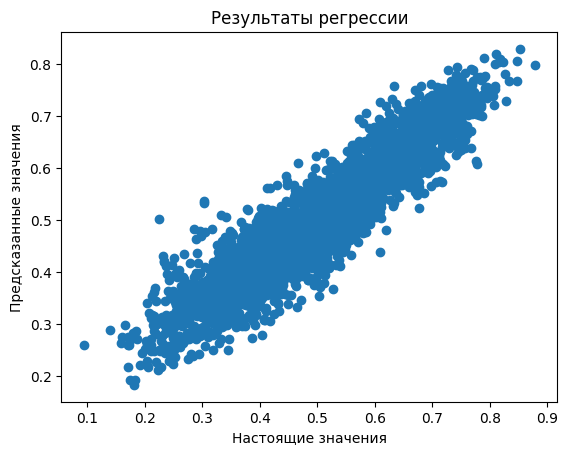

Метрики на тестовой выборке:
R2: 0.8647257653669845

Метрики при кросс-валидации:
Среднее R2: 0.8660786670066732

Время, затраченное на обучение модели: 0.49312567710876465 секунд


In [12]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели

cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")

print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")
print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")

# XGBoost

In [13]:
# Определим модель XGBoost
model = xgb.XGBRegressor()

# Обучение модели
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

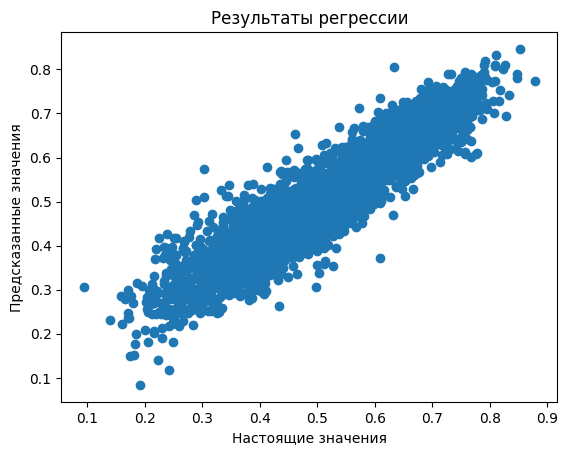

Метрики на тестовой выборке:
R2: 0.8572415068010717

Метрики при кросс-валидации:
Среднее R2: 0.861180291500728

Время, затраченное на обучение модели: 0.8605811595916748 секунд


In [14]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности
r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели

cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")

print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")

print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")

# Gradient Boosting

In [19]:
# Определим модель
model = GradientBoostingRegressor()

# Обучение модели
start_time = time.time()

model.fit(X_train, y_train)

training_time = time.time() - start_time

In [ ]:
# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик точности

r2 = r2_score(y_test, y_pred)

# Кросс-валидация для оценки точности модели

cv_r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')

# Визуализация результата и метрики точности
plt.scatter(y_test, y_pred)
plt.xlabel("Настоящие значения")
plt.ylabel("Предсказанные значения")
plt.title("Результаты регрессии")
plt.show()

# Вывод результатов
print("Метрики на тестовой выборке:")

print(f"R2: {r2}")

print("\nМетрики при кросс-валидации:")

print(f"Среднее R2: {np.mean(cv_r2_scores)}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели: {training_time} секунд")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15555
[LightGBM] [Info] Number of data points in the train set: 10553, number of used features: 61
[LightGBM] [Info] Start training from score 0.506908
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041825 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15555
[LightGBM] [Info] Number of data points in the train set: 10553, number of used features: 61
[LightGBM] [Info] Start training from score 0.506611
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040399 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15555
[LightGBM] [Info] Number of data points in the train set: 10554, number of used features: 61
[LightGBM] [Info] Start 

# Выбор модели

Самой быстрой и точной моделью оказалась LightGBM, подпор гиперпараметров делаем для неё.

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
# Создаем объект модели LightGBM
model = lgb.LGBMRegressor()

# Задаем сетку гиперпараметров для перебора
param_grid = {
    'num_leaves': [30, 50],
    'learning_rate': [0.1, 0.05],
    'n_estimators': [100, 200],
}
# Создание объекта GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Обучение модели с оптимизацией гиперпараметров
start_time = time.time()
grid_search.fit(X_train, y_train)
training_time = time.time() - start_time

# Получение лучших параметров
best_params = grid_search.best_params_

# Предсказание на тестовой выборке с лучшей моделью
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Лучшие параметры:", best_params)
print("\nМетрики на тестовой выборке с лучшей моделью:")

print(f"R2: {r2}")

# Вывод времени обучения
print(f"\nВремя, затраченное на обучение модели с оптимизированными гиперпараметрами: {training_time} секунд")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002261 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15555
[LightGBM] [Info] Number of data points in the train set: 13192, number of used features: 61
[LightGBM] [Info] Start training from score 0.507145
Лучшие параметры: {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 50}

Метрики на тестовой выборке с лучшей моделью:
R2: 0.8864785849846685

Время, затраченное на обучение модели с оптимизированными гиперпараметрами: 1919.864819765091 секунд
